In [2]:
Sys.setlocale("LC_ALL", "English")
Sys.setenv(LANG = "en_US.UTF")

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [5]:
library(dplyr)

library(keras)
library(tfruns)

library(tfestimators)

tfestimators is not recomended for new code. It is only compatible with Tensorflow version 1, and is not compatable with Tensorflow version 2.



In [6]:
mnist <- dslabs::read_mnist()

In [7]:
mnist_x <- mnist$train$images
mnist_y <- mnist$train$labels

In [8]:
dim(mnist_x)

[1] 60000   784

#### 표준화

In [ ]:
colnames(mnist_x) <- paste0("V", 1:ncol(mnist_x))
mnist_x <- mnist_x / 255

### 원-핫 인코딩
### ```to_categorical()```

In [9]:
mnist_y <- to_categorical(mnist_y, 10)

Loaded Tensorflow version 2.8.0



### 딥러닝

<img src = "https://bradleyboehmke.github.io/HOML/images/deep_neural-net.png">

### 피드포워드 DNN

<img src = "https://bradleyboehmke.github.io/HOML/images/mlp_network.png">

### 네트워크 아키텍처
#### 1. 은닉층
#### 2. 출력층

### ```keras_model_sequential()```

In [15]:
model <- keras_model_sequential() %>%
  layer_dense(units = 128, input_shape = ncol(mnist_x)) %>%
  layer_dense(units = 64) %>%
  layer_dense(units = 10)

In [16]:
summary(model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_4 (Dense)                    (None, 128)                     100480      
                                                                                
 dense_3 (Dense)                    (None, 64)                      8256        
                                                                                
 dense_2 (Dense)                    (None, 10)                      650         
                                                                                
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________________________________________


### 활성화
<img src = "https://bradleyboehmke.github.io/HOML/images/perceptron_node.png">

#### 1. 선형
#### 2. ReLU
#### 3. 시그모이드
#### 4. 소프트맥스

In [22]:
model <- keras_model_sequential() %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax")

In [23]:
summary(model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_7 (Dense)                    (None, 128)                     100480      
                                                                                
 dense_6 (Dense)                    (None, 64)                      8256        
                                                                                
 dense_5 (Dense)                    (None, 10)                      650         
                                                                                
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________________________________________


### 역전파

In [24]:
model <- keras_model_sequential() %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax") %>%

  compile(
      loss = "categorical_crossentropy",
      optimizer = optimizer_rmsprop(),
      metrics = c("accuracy")
  )

In [25]:
summary(model)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_10 (Dense)                   (None, 128)                     100480      
                                                                                
 dense_9 (Dense)                    (None, 64)                      8256        
                                                                                
 dense_8 (Dense)                    (None, 10)                      650         
                                                                                
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________________________________________


### 모델 훈련

### ```fit()```
- ```batch_size``` : 데이터 배치, 작은 값은 계산적으로 더 부담, 큰 값은 더 적은 피드백 신호를 제공, 값은 일반적으로 32,, 64, 128, 256
- ```epochs``` : 알고리즘이 전체 데이터 세트를 보는 횟수. 알고리즘이 데이터 세트의 모든 샘플을 볼 때마다 에포크가 완료, (훈련 세트에는 60,000개의 관찰이 있으므로 128개의 배치를 실행하려면 한 에포크에 대해 469개의 패스가 필요. 데이터의 기능과 관계가 복잡할수록 모델이 학습하고 가중치를 조정하고 손실 함수를 최소화하는 데 더 많은 에포크가 필요.)
- ```validation_split``` : 모델은 데이터의 XX%를 유지하므로 샘플 외 오류율에 대한 보다 정확한 추정치를 계산할 수| 있다.

In [26]:
fit1 <- model %>%
  fit(
    x = mnist_x,
    y = mnist_y,
    epochs = 25,
    batch_size = 128,
    validation_split = 0.2,
    verbose = FALSE
  )

In [27]:
fit1


Final epoch (plot to see history):
        loss: 0.07869
    accuracy: 0.9843
    val_loss: 0.5139
val_accuracy: 0.9641 

`geom_smooth()` using formula 'y ~ x'



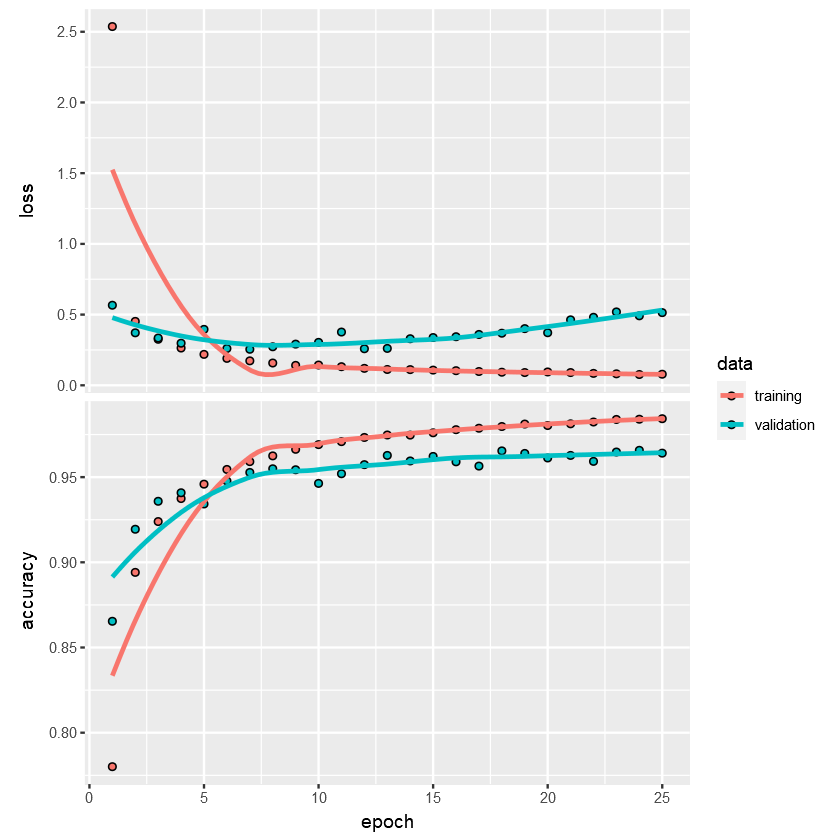

In [28]:
plot(fit1)

### 모델 튜닝
1. 모델 용량 조정
2. 일괄 정규화 추가
3. 정규화 추가
4. 학습률 조정

### 모델용량
- 일반적으로 모델 용량을 기반으로 예측 성능을 극대화
- 더 높은 모델 용량(더 많은 레이어 및 노드)은 모델에 대한 더 많은 용량 을 초래
- 한편으로 이는 모델이 데이터에서 더 많은 기능과 패턴을 학습할 수 있도록 하므로 유용할 수 있음. 
- 너무 많은 용량을 가진 모델은 훈련 데이터에 과적합. 
- 일반적으로 모델 용량을 최소화하면서 검증 오류 성능을 최대화.

| | | | 은닉층 |
| -- | -- | -- | -- |
| size | 1 | 2 | 3 |
| small | 16 | 16, 8 | 16,8, 4 |
| medium | 64 | 64, 32 | 64, 32, 16 |
| large | 256 | 256, 128 | 256, 128, 64 |

### 조기종료 콜백
### ```callback()```

### 배치 정규화
### ```layer_batch_normalization()``` 

In [29]:
model_w_norm <- keras_model_sequential() %>%
  
  layer_dense(units = 256, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_batch_normalization() %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dense(units = 10, activation = "softmax") %>%

  compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer_rmsprop(),
    metrics = c("accuracy")
  )

In [31]:
summary(model_w_norm)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_14 (Dense)                   (None, 256)                     200960      
                                                                                
 batch_normalization_2 (BatchNormal  (None, 256)                    1024        
 ization)                                                                       
                                                                                
 dense_13 (Dense)                   (None, 128)                     32896       
                                                                                
 batch_normalization_1 (BatchNormal  (None, 128)                    512         
 ization)                                                                       
                                                                                
 dense

### 정규화
### ```regularize_l2``` / ```regularize_l1```

In [32]:
model_w_reg <- keras_model_sequential() %>%
  
  layer_dense(units = 256, activation = "relu", input_shape = ncol(mnist_x),
              kernel_regularizer = regularizer_l2(0.001)) %>%
  layer_batch_normalization() %>%
  layer_dense(units = 128, activation = "relu", 
              kernel_regularizer = regularizer_l2(0.001)) %>%
  layer_batch_normalization() %>%
  layer_dense(units = 64, activation = "relu", 
              kernel_regularizer = regularizer_l2(0.001)) %>%
  layer_batch_normalization() %>%
  layer_dense(units = 10, activation = "softmax") %>%

  compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer_rmsprop(),
    metrics = c("accuracy")
  )

In [33]:
summary(model_w_norm)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_14 (Dense)                   (None, 256)                     200960      
                                                                                
 batch_normalization_2 (BatchNormal  (None, 256)                    1024        
 ization)                                                                       
                                                                                
 dense_13 (Dense)                   (None, 128)                     32896       
                                                                                
 batch_normalization_1 (BatchNormal  (None, 128)                    512         
 ization)                                                                       
                                                                                
 dense

### 드롭아웃
### ```layer_dropout()```
- 다른 노드를 무작위로 제거하여 중요하지 않은 우연 패턴(노이즈)에 모델이 래칭되는 것을 방지하는 데 도움
- 일반적으로 드롭아웃 비율은 0.2–0.5 범위

In [34]:
model_w_drop <- keras_model_sequential() %>%
  
  layer_dense(units = 256, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 10, activation = "softmax") %>%

  compile(
    loss = "categorical_crossentropy",
    optimizer = optimizer_rmsprop(),
    metrics = c("accuracy")
  )

In [35]:
summary(model_w_drop)

Model: "sequential_5"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_22 (Dense)                   (None, 256)                     200960      
                                                                                
 dropout_2 (Dropout)                (None, 256)                     0           
                                                                                
 dense_21 (Dense)                   (None, 128)                     32896       
                                                                                
 dropout_1 (Dropout)                (None, 128)                     0           
                                                                                
 dense_20 (Dense)                   (None, 64)                      8256        
                                                                                
 dropo

### 학습률 조정
- 미니 배치 SGD 옵티마이저는 더 이상 개선되지 않을 때까지 손실 기울기를 점진적으로 낮춤
- 증분 단계의 크기(즉, 학습률)는 전역 최소값으로 가는 대신 로컬 최소값에 갇히는지 여부를 결정
<img src = "https://bradleyboehmke.github.io/HOML/11-deep-learning_files/figure-html/local-vs-global-1.png">

- 다른 옵티마이저(예: RMSProp, Adam, Adagrad)는 학습률을 결정하기 위한 알고리즘 접근 방식이 다름
- 주어진 옵티마이저의 학습률을 조정하거나 사용되는 옵티마이저를 조정
- 검증 손실이 개선되지 않으면 학습률을 자동으로 2 ~ 10배 조정

In [36]:
model_w_adj_lrn <- keras_model_sequential() %>%
  layer_dense(units = 256, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 10, activation = "softmax") %>%
  compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer_adam(),
    metrics = c('accuracy')
  ) %>%
  fit(
    x = mnist_x,
    y = mnist_y,
    epochs = 35,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = list(
      callback_early_stopping(patience = 5),
      callback_reduce_lr_on_plateau(factor = 0.05)
      ),
    verbose = FALSE
  )

In [37]:
model_w_adj_lrn


Final epoch (plot to see history):
        loss: 0.04402
    accuracy: 0.9852
    val_loss: 0.07315
val_accuracy: 0.9806
          lr: 0.001 

In [38]:
min(model_w_adj_lrn$metrics$val_loss)
max(model_w_adj_lrn$metrics$val_acc)

[1] 0.06791713

[1] 0.9818333

`geom_smooth()` using formula 'y ~ x'



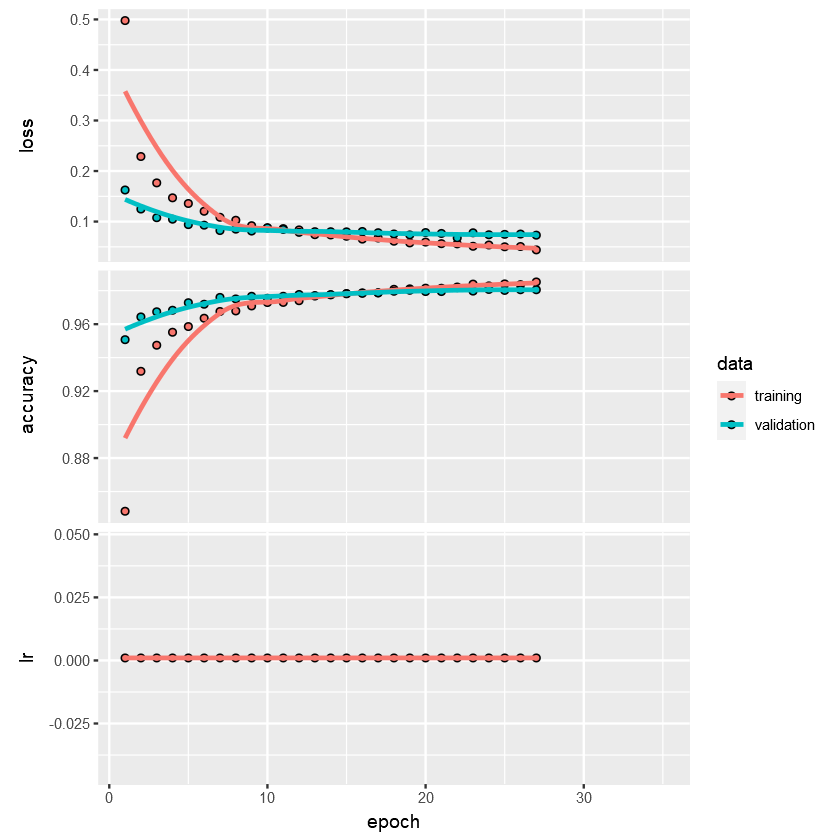

In [39]:
plot(model_w_adj_lrn)

### 그리드서치

- tfruns 패키지 (Allaire 2018 ) 를 사용하여 훈련 실행을 추적, 시각화 및 관리하기 위한 추가 유연성을 제공

#### 플래그 설정
### ```tfruns::flags()```

In [41]:
FLAGS <- tfruns::flags(
  flag_numeric("nodes1", 256),
  flag_numeric("nodes2", 128),
  flag_numeric("nodes3", 64),

  flag_numeric("dropout1", 0.4),
  flag_numeric("dropout2", 0.3),
  flag_numeric("dropout3", 0.2),

  flag_string("optimizer", "rmsprop"),
  flag_numeric("lr_annealing", 0.1)
)

#### 플래그 적용

In [42]:
model <- keras_model_sequential() %>%
  layer_dense(units = FLAGS$nodes1, activation = "relu", input_shape = ncol(mnist_x)) %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = FLAGS$dropout1) %>%
  layer_dense(units = FLAGS$nodes2, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = FLAGS$dropout2) %>%
  layer_dense(units = FLAGS$nodes3, activation = "relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(rate = FLAGS$dropout3) %>%
  layer_dense(units = 10, activation = "softmax") %>%
  compile(
    loss = 'categorical_crossentropy',
    metrics = c('accuracy'),
    optimizer = FLAGS$optimizer
  ) %>%
  fit(
    x = mnist_x,
    y = mnist_y,
    epochs = 35,
    batch_size = 128,
    validation_split = 0.2,
    callbacks = list(
      callback_early_stopping(patience = 5),
      callback_reduce_lr_on_plateau(factor = FLAGS$lr_annealing)
    ),
    verbose = FALSE
  )

In [44]:
model


Final epoch (plot to see history):
        loss: 0.05196
    accuracy: 0.9844
    val_loss: 0.07393
val_accuracy: 0.9813
          lr: 0.001 

`geom_smooth()` using formula 'y ~ x'



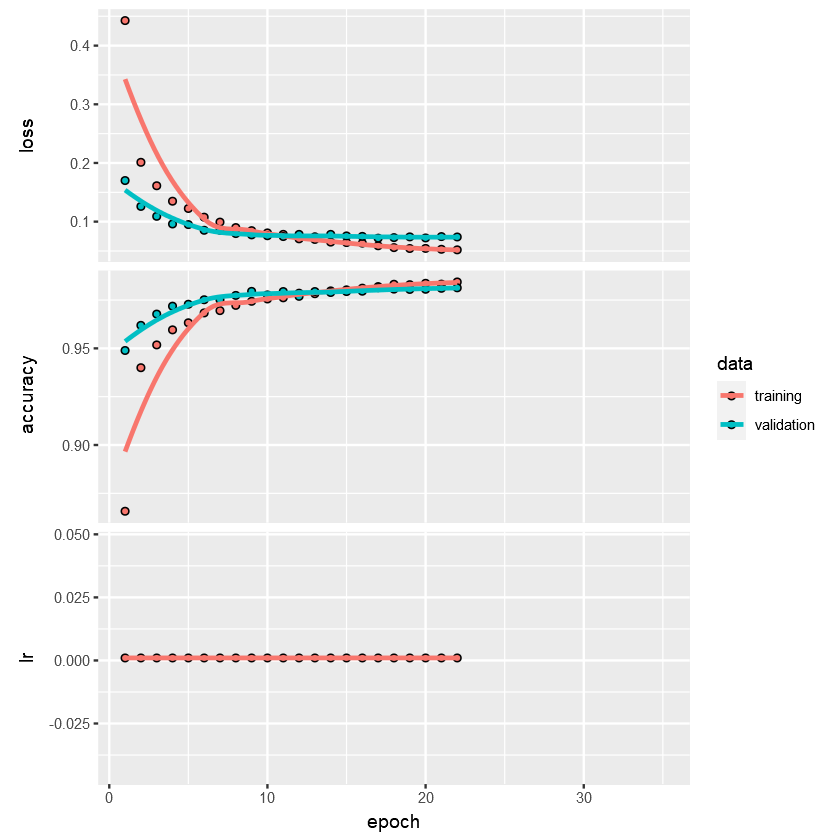

In [45]:
plot(model)

### ```tfruns::tuning_run()```
- ```file``` : 모델이 저장된 R파일의 경로
- ```sample = 0.05``` : 전체모델의 5%만 평가

In [ ]:
runs <- tfruns::tuning_run("scripts/mnist-grid-search.R", 
  flags = list(
    nodes1 = c(64, 128, 256),
    nodes2 = c(64, 128, 256),
    nodes3 = c(64, 128, 256),
    dropout1 = c(0.2, 0.3, 0.4),
    dropout2 = c(0.2, 0.3, 0.4),
    dropout3 = c(0.2, 0.3, 0.4),
    optimizer = c("rmsprop", "adam"),
    lr_annealing = c(0.1, 0.05)
  ),
  sample = 0.05
)

In [ ]:
runs %>% 
    filter(metric_val_loss == min(metric_val_loss)) %>% 
    glimpse()

```
## Observations: 1
## Variables: 31
## $ run_dir            <chr> "runs/2019-04-27T14-44-38Z"
## $ metric_loss        <dbl> 0.0598
## $ metric_acc         <dbl> 0.9806
## $ metric_val_loss    <dbl> 0.0686
## $ metric_val_acc     <dbl> 0.9806
## $ flag_nodes1        <int> 256
## $ flag_nodes2        <int> 128
## $ flag_nodes3        <int> 256
## $ flag_dropout1      <dbl> 0.4
## $ flag_dropout2      <dbl> 0.2
## $ flag_dropout3      <dbl> 0.3
## $ flag_optimizer     <chr> "adam"
## $ flag_lr_annealing  <dbl> 0.05
## $ samples            <int> 48000
## $ validation_samples <int> 12000
## $ batch_size         <int> 128
## $ epochs             <int> 35
## $ epochs_completed   <int> 17
## $ metrics            <chr> "runs/2019-04-27T14-44-38Z/tfruns.d/metrics.json"
## $ model              <chr> "Model\n_______________________________________________________…
## $ loss_function      <chr> "categorical_crossentropy"
## $ optimizer          <chr> "<tensorflow.python.keras.optimizers.Adam>"
## $ learning_rate      <dbl> 0.001
## $ script             <chr> "mnist-grid-search.R"
## $ start              <dttm> 2019-04-27 14:44:38
## $ end                <dttm> 2019-04-27 14:45:39
## $ completed          <lgl> TRUE
## $ output             <chr> "\n> #' Trains a feedforward DL model on the MNIST dataset.\n> …
## $ source_code        <chr> "runs/2019-04-27T14-44-38Z/tfruns.d/source.tar.gz"
## $ context            <chr> "local"
## $ type               <chr> "training"
```